In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rd
tf.compat.v1.disable_eager_execution()
import cv2
import os 
import json

In [3]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet")
image_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\elephanat_image.jpeg"
image = tf.keras.preprocessing.image.load_img(image_dir, target_size=(224, 224))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
image_tensor = np.expand_dims(image_tensor, axis=0)
image_tensor = tf.keras.applications.vgg16.preprocess_input(image_tensor)

model_prediction = model.predict(image_tensor)
#print(model_prediction, model_prediction.shape)
#print(f"ELEPHANT MARK PREDCITED: [{np.argmax(model_prediction)}]")
#print(f"DECODE PREDICTION RESULT: \
#      ![{tf.keras.applications.vgg16.decode_predictions(model_prediction, top=3)}]!")

model.summary()


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Tensor("strided_slice_13:0", shape=(None,), dtype=float32)
Tensor("gradients_6/block5_pool/MaxPool_grad/MaxPoolGrad:0", shape=(None, 14, 14, 512), dtype=float32)
Tensor("block5_conv3/Relu:0", shape=(None, 14, 14, 512), dtype=float32)


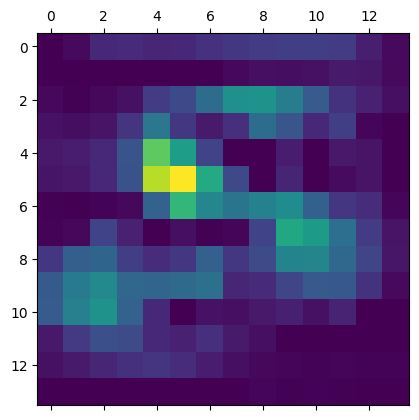

In [13]:
african_elephant_output = model.output[:, 386]
print(african_elephant_output)
last_conv_layer = model.get_layer("block5_conv3")
grads = tf.keras.backend.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = tf.keras.backend.mean(grads, axis=(0, 1, 2))

print(last_conv_layer.output)
iterate = tf.keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([image_tensor])

for iteration in range(512):
    conv_layer_output_value[:, :, iteration] *= pooled_grads_value[iteration]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [10]:
img = cv2.imread(image_dir)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\elephant_frame.jpg", superimposed_img)


True